In [120]:
import numpy as np # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
# Plots
import seaborn as sns # importing seaborn for statistical plots
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
# Train test split
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# Model
from sklearn.neighbors import KNeighborsClassifier # To model the KNN classifier
# Metrics
from sklearn import metrics # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of a classification
from sklearn import preprocessing # Provides several common utility functions: standardization of the data set
from sklearn.preprocessing import StandardScaler # Standardizes features by removing the mean andscaling to unit variance
from sklearn.metrics import accuracy_score

In [121]:
data=pd.read_csv('BTC-2021min.csv')
data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...,...
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


# Data Preprocessing

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [123]:
data.shape

(610782, 9)

In [124]:
data.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,0.193193,8.859586e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


In [125]:
data.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [126]:
data.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [127]:
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


# EDA

<AxesSubplot:xlabel='low', ylabel='Density'>

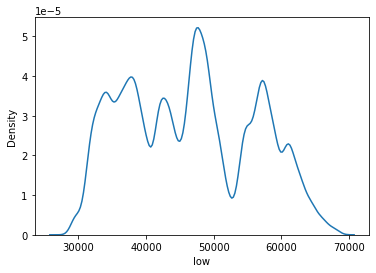

In [128]:
sns.kdeplot(data['low'])

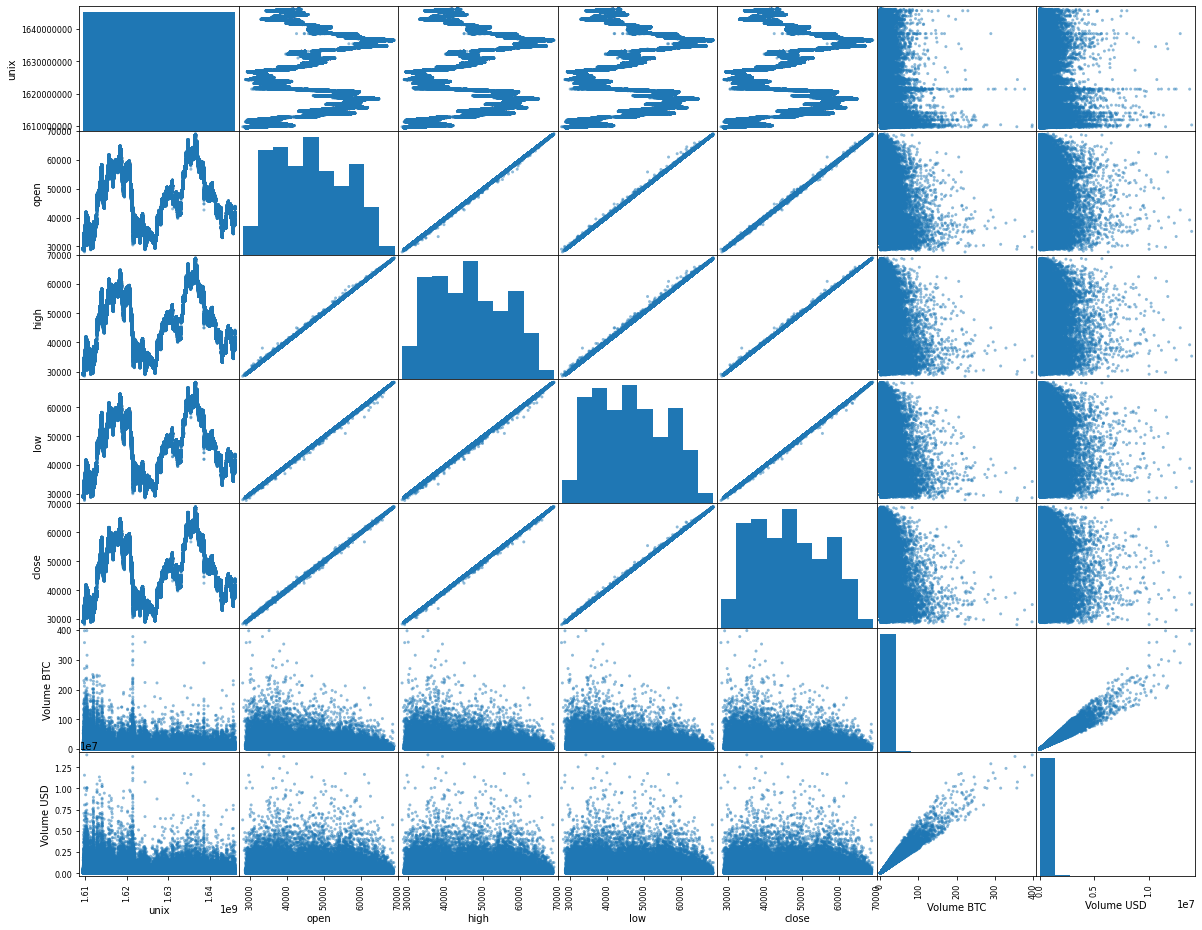

In [129]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,16))
plt.show()

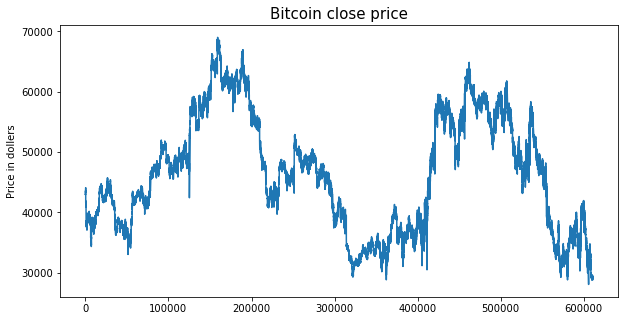

In [130]:
plt.figure(figsize=(10,5))
plt.plot(data['close'])
plt.title('Bitcoin close price', fontsize=15)
plt.ylabel('Price in dollers')
plt.show()

In [131]:
data=data.drop(['unix'],axis=1)
data

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...
610777,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

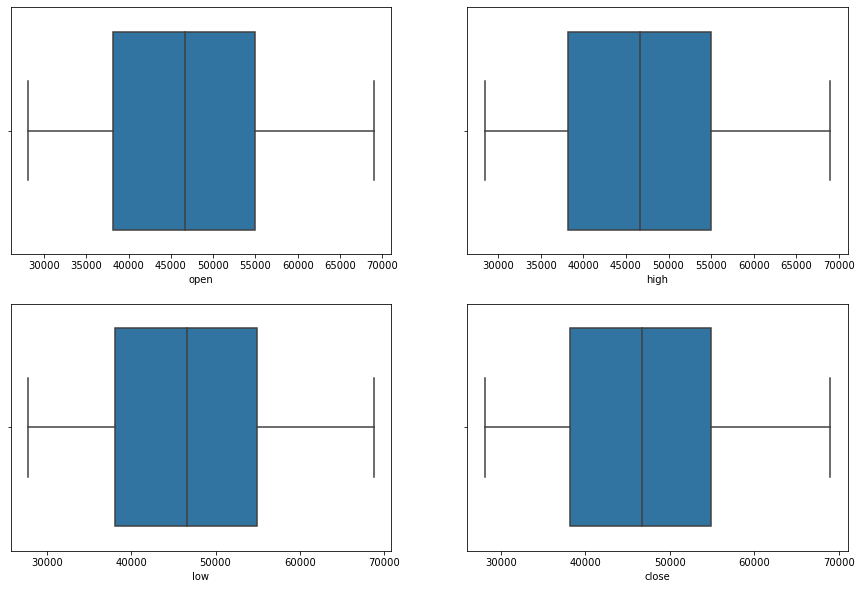

In [132]:
features=['open','high','low','close']
plt.subplots(figsize=(15,10))
for i,column in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[column])
plt.show()

In [133]:
data['Dates'] = pd.to_datetime(data['date']).dt.date
data['Time'] = pd.to_datetime(data['date']).dt.time
data.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Dates,Time
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01,03:43:00
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01,03:41:00
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01,03:40:00
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01,03:39:00
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01,03:38:00


In [134]:
data['year'] = pd.DatetimeIndex(data['Dates']).year
data['month'] = pd.DatetimeIndex(data['Dates']).month
data.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Dates,Time,year,month
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01,03:43:00,2022,3
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01,03:41:00,2022,3
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01,03:40:00,2022,3
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01,03:39:00,2022,3
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01,03:38:00,2022,3


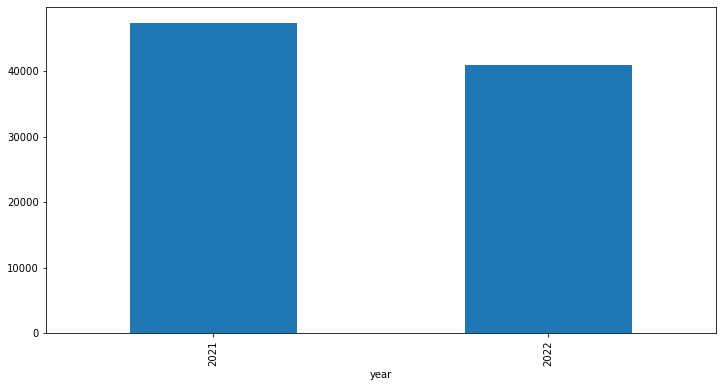

In [135]:
group_class = data.groupby('year').mean()
plt.subplots(figsize=(12,6))
for i,col in enumerate(features):
    group_class[col].plot.bar()
plt.show()

In [136]:
data['open-close']=data['open']-data['close']
data['low-high']=data['low']-data['high']
data['target']=np.where(data['close'].shift(-1)>data['close'],1,0)
data.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Dates,Time,year,month,open-close,low-high,target
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01,03:43:00,2022,3,0.00,0.00,0
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01,03:41:00,2022,3,-28.35,-28.36,0
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01,03:40:00,2022,3,6.21,-6.21,0
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01,03:39:00,2022,3,35.72,-35.72,1
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01,03:38:00,2022,3,28.36,-28.36,1


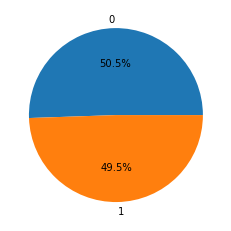

In [137]:
plt.pie(data['target'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

<AxesSubplot:>

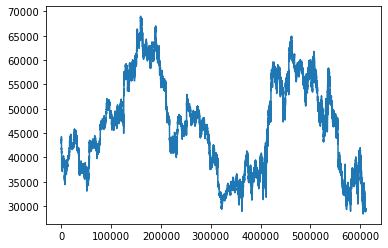

In [138]:
data['high'].plot()

<AxesSubplot:>

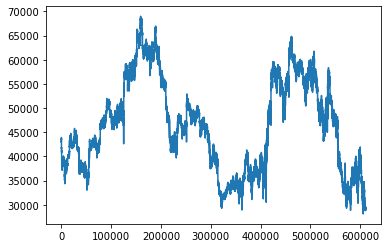

In [139]:
data['open'].plot()

<AxesSubplot:ylabel='Frequency'>

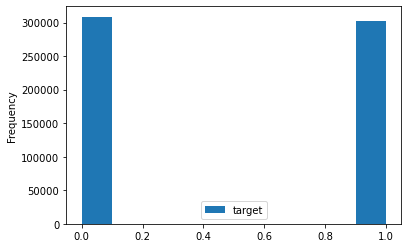

In [140]:
data.plot( x='Volume USD', y='target', kind='hist')

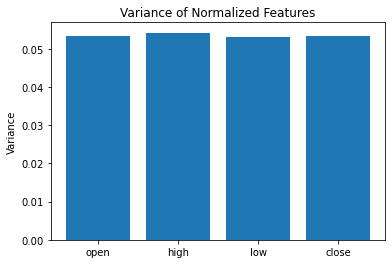

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data[features]), columns=features)

variances = data_norm.var()

fig, ax = plt.subplots()
ax.bar(variances.index, variances.values)
ax.set_ylabel('Variance')
ax.set_title('Variance of Normalized Features')
plt.show()

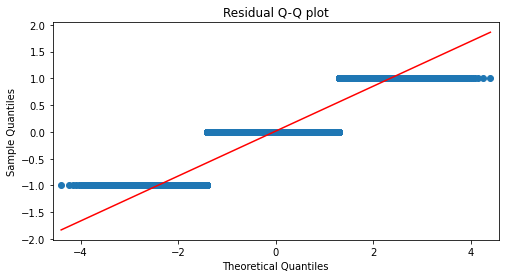

In [197]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Residual Q-Q plot')
plt.show()

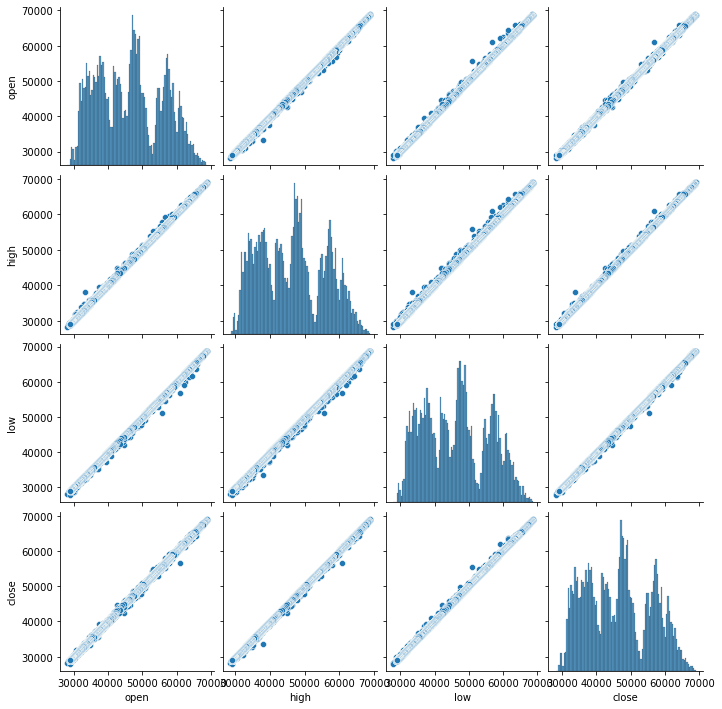

In [141]:
features=['open','high','low','close']
sns.pairplot(data[features])

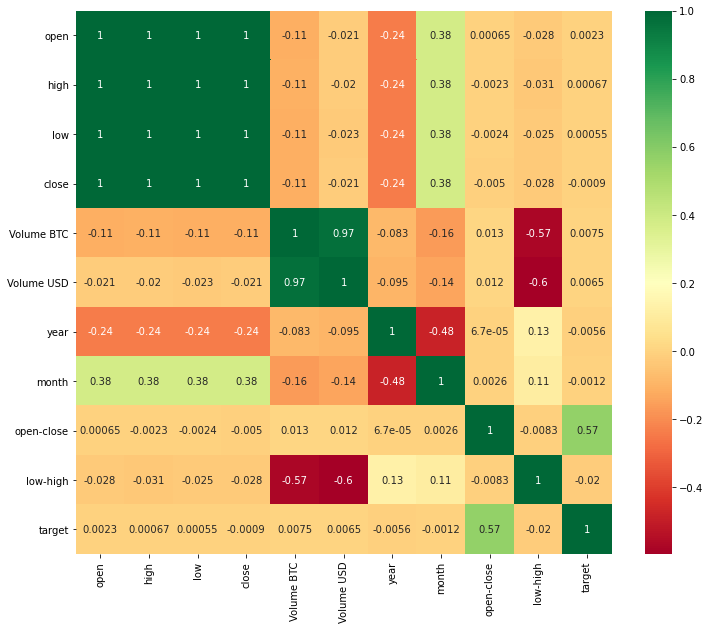

In [142]:
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

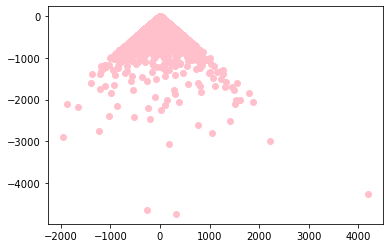

In [143]:
plt.scatter(data['open-close'],data['low-high'],c='pink')
plt.show()

# splitting the dataset

In [144]:
X=data[['open-close','low-high']]
y=data['target']

In [145]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [146]:
# Checking split of data
print('X training data size: {}'.format(X_train.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size: {}'.format(X_test.shape))
print('y testing data size: {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(data.index)) * 100))

X training data size: (427547, 2)
y training data size: (427547,)
X testing data size: (183235, 2)
y testing data size: (183235,)
70.00% of data is in training set
30.00% of data is in test set


In [176]:
X_train

,open-close,low-high
286436,11.36,-11.36
448857,134.81,-182.78
595454,236.64,-236.64
204890,-32.52,-39.03
157905,-16.21,-37.35
...,...,...
371403,-3.46,-13.81
491263,149.47,-187.78
470924,-15.80,-49.80
491755,-55.46,-87.49


In [177]:
X_test

,open-close,low-high
232627,-48.83,-64.97
276223,1.10,-1.10
137059,-13.70,-13.70
553098,-51.86,-58.32
485836,56.46,-90.77
...,...,...
143852,10.90,-16.66
333755,16.64,-16.64
70346,-15.48,-16.35
443917,-104.27,-118.19


In [178]:
y_train

286436    1
448857    1
595454    1
204890    0
157905    0
         ..
371403    1
491263    1
470924    0
491755    0
128037    0
Name: target, Length: 427547, dtype: int32

In [179]:
y_test

232627    0
276223    1
137059    0
553098    0
485836    1
         ..
143852    0
333755    0
70346     0
443917    0
492832    1
Name: target, Length: 183235, dtype: int32

# KNN

In [147]:
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList))

In [148]:
ac_scores = []

In [149]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)

In [150]:
MSE = [1 - x for x in ac_scores]

In [151]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

In [152]:
print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.7828362485333042, 0.8034654951292056, 0.8237618358937976, 0.8198160831718831, 0.8339072775397713, 0.8364177149562038, 0.8381368188391956, 0.8396321663437663, 0.840712745927361, 0.8414276748437799]

Misclassification error :
 [0.21716375146669575, 0.19653450487079438, 0.1762381641062024, 0.18018391682811685, 0.16609272246022866, 0.16358228504379624, 0.16186318116080445, 0.16036783365623375, 0.159287254072639, 0.1585723251562201]

The optimal number of neighbor is k= 19


In [153]:
acc_tr=knn.score(X_train,y_train)
print(" Accuracy on train dataset is: ",acc_tr)

 Accuracy on train dataset is:  0.8505029856366668


In [154]:
acc_te=knn.score(X_test,y_test)
print(" Accuracy on test dataset is: ",acc_te)

 Accuracy on test dataset is:  0.8414276748437799


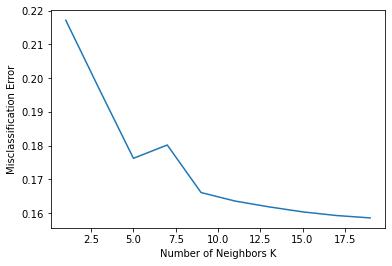

In [155]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

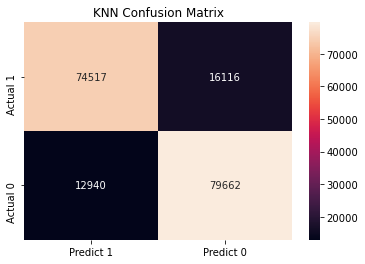

In [156]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
data_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('KNN Confusion Matrix')
sns.heatmap(data_cm, annot=True, fmt='g');

In [157]:
# Accuracy
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
# Print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.8414


# Logistic Regression 

In [158]:
import seaborn as sns # importing seaborn for statistical plots
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
# Train test split
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import model_selection # Sklearn package to evaluate a score by cross-validation
# Model
from sklearn.linear_model import LogisticRegression # To model the Logistic regression classifier
# Cross Validation
from sklearn.model_selection import KFold # Splits dataset into k consecutive folds
from sklearn.model_selection import cross_val_score # Evaluates a score by cross-validation
# Metrics
from sklearn import metrics # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix # Computes confusion matrix to evaluate the accuracy of a classification
from sklearn import preprocessing # Provides several common utility functions: standardization of the data set

In [159]:
# Model building
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [160]:
acc_train=log_model.score(X_train,y_train)
print("acccuracy on training dataset is : ",acc_train)

acccuracy on training dataset is :  0.8458578822913037


In [161]:
acc_test=log_model.score(X_test,y_test)
print("acccuracy on test dataset is : ",acc_test)

acccuracy on test dataset is :  0.8461429312085573


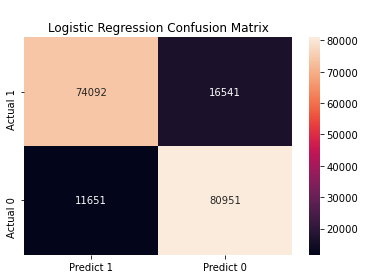

In [162]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, log_pred, labels=[1, 0])
data_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('\nLogistic Regression Confusion Matrix')
sns.heatmap(data_cm, annot=True, fmt='g');

In [163]:
# Accuracy
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]
# Print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('\nClassification accuracy: {0:0.4f}'.format(classification_accuracy))


Classification accuracy: 0.8461


#  DecisionTree 

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]) # Replace strings with an integer
        data.head(10)

In [166]:
# Build the model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [167]:
# Score
print('Training score:', dTree.score(X_train, y_train))

Training score: 0.9677579307070334


In [168]:
# Score
print('Test score:', dTree.score(X_test, y_test))

Test score: 0.7865200425682867


In [169]:
# Build the model
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [170]:
# Score
print('Training score:', dTree.score(X_train, y_train))

Training score: 0.9677579307070334


In [171]:
# Score
print('Test score:', dTree.score(X_test, y_test))

Test score: 0.7876115370971704


# Random Forest 

In [172]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [173]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score of training dataset=", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score of training dataset= 0.9677579307070334


In [174]:
predictions = rfc.predict(X_test)
print("Accuracy_Score of test dataset=", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score of test dataset= 0.8235217070974432


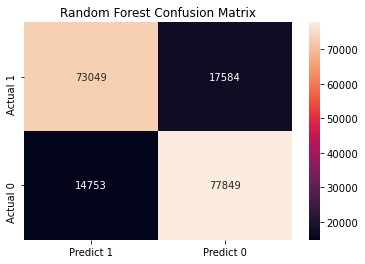

In [175]:
# Confusion matrix
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
columns = [i for i in ["Predict 1","Predict 0"]])
plt.title('Random Forest Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='g');

# Linear Regression

In [180]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [185]:
from sklearn.linear_model import LinearRegression # To model the ordinary least squares Linear  Regression 
from sklearn.linear_model import Ridge # To model Linear least squares with l2 regularization # Linear Model trained with L1 prior as regularizer   
# Metrics 
from sklearn import metrics # sklearn metrics module implements utility functions  to measure classification performance 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lr = LinearRegression() 
lr.fit(X_train, y_train) # Fitting the model on Training data 
y_pred_lr = lr.predict(X_test) # Making predictions on Test data 
print("Linear Regression model coefficients:", (lr.coef_)) # Printing the coefficients print('\nLR R2_score on training data:',lr.score(X_train, y_train)) 
print('LR R2_score on test data:',lr.score(X_test, y_test)) 
print('LR Mean Square Error :',mean_squared_error(y_test,y_pred_lr)) 
print('LR Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('LR Mean Absolute Error :',mean_absolute_error(y_test, y_pred_lr))

Linear Regression model coefficients: [ 0.00525172 -0.00014496]
LR R2_score on test data: 0.32376709257166103
LR Mean Square Error : 0.16903870546083838
LR Root Mean Square Error : 0.4111431690553041
LR Mean Absolute Error : 0.3745757563293569


In [186]:
# Creating a regularized RIDGE model  
ridge = Ridge(alpha=.3) 
ridge.fit(X_train,y_train) # Fitting the model on Training data
y_pred_ridge = ridge.predict(X_test) # Making predictions on Test data
print("Ridge model coefficients:", (ridge.coef_)) # Printing the coefficients print('\nRidge R2_score on training data:',ridge.score(X_train, y_train)) print('Ridge R2_score on test data:',ridge.score(X_test, y_test)) 
print('Ridge Mean Square Error :',mean_squared_error(y_test,y_pred_ridge)) 
print('Ridge Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Ridge Mean Absolute Error :',mean_absolute_error(y_test, y_pred_ridge)) 

Ridge model coefficients: [ 0.00525172 -0.00014496]
Ridge Mean Square Error : 0.16903870546125854
Ridge Root Mean Square Error : 0.4111431690558151
Ridge Mean Absolute Error : 0.3745757563449321


In [188]:
# Creating a regularized RIDGE model  
lasso = Ridge(alpha=.3) 
lasso.fit(X_train,y_train) # Fitting the model on Training data
y_pred_ridge = lasso.predict(X_test) # Making predictions on Test data
print("Lasso model coefficients:", (lasso.coef_)) # Printing the coefficients print('\nRidge R2_score on training data:',ridge.score(X_train, y_train)) print('Ridge R2_score on test data:',ridge.score(X_test, y_test)) 
print('Lasso Mean Square Error :',mean_squared_error(y_test,y_pred_ridge)) 
print('Lasso Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Lasso Mean Absolute Error :',mean_absolute_error(y_test, y_pred_ridge)) 

Lasso model coefficients: [ 0.00525172 -0.00014496]
Lasso Mean Square Error : 0.16903870546125854
Lasso Root Mean Square Error : 0.4111431690558151
Lasso Mean Absolute Error : 0.3745757563449321
